<a href="https://colab.research.google.com/github/MarvinLopezOsorio/AnaliticaPredictiva_Tareas/blob/main/Clustering%20vinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

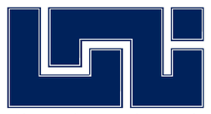

<h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Predictiva y Machine Learning con R, Python y Databricks


[UNI-DEPEC](https://posgrado.uni.edu.ni)

**Estudiante:** 
*   Marvin López Osorio
*   Eduardo Rivera


# **Tarea Modelos No Supervisados**
## **Modelo de Clustering: Grupos de vino**
Los set de datos procesados corresponden a datos de variantes de vino tinto. Se utilizó como fuente el [dataset en Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) que referencia al [repositorio de la University of California, Irvine](https://archive.ics.uci.edu/ml/datasets/wine+quality). En este Colab se exploran los posibles 'tipos de vino' en funcion de sus características físico-químicas, no se consideró para el experimento la separación de vino tinto/blanco procedente de los dataset originales, con el objetivo de observar que conjuntos de vino pueden ser identificados, y si son claramente definidos.

###**Instalación de librerias necesarias**

In [1]:
#Instalar libreria
!pip install pycaret

###**Carga de librerias necesarias**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pycaret.clustering import *

###**Obtención de los datos**
Los datos originales están contenidos en 2 archivos diferentes. Primeramente  combinaron ambos set de datos.

In [3]:
#Referencias al repositorio de origen
repositorio = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'
red_wine_file = 'winequality-red.csv'
white_wine_file = 'winequality-white.csv'

#Leer datos
red_wine = pd.read_csv(repositorio + red_wine_file, sep=';')
white_wine = pd.read_csv(repositorio + white_wine_file, sep=';')

#Combinar los dataset
vinos = red_wine.append(white_wine)
vinos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


El dataset original continene las siguientes variables:
*   fixed acidity: acidez fija
*   volatile acidity: acidez volatil
*   citric acid: acido cítrico
*   residual sugar: azucar residual
*   chlorides: cloruros
*   free sulfur dioxide: dioxido de azufre libre
*   total sulfur dioxide: dioxido de azufre total
*   density: densidad
*   pH
*   sulphates: sulfatos
*   alcohol
*   quality: calidad

En esta etapa solamente se renombran las variables para mejor entendimiento y se obtiene información general del dataset.

In [5]:
#Se crea lista de etiquetas y se asigna a dataset
etiquetas_de_columna = ['acidez_fija','acidez_volatil','acido_citrico','azucar_residual','cloruros','SO2_libre','SO2_total','densidad','pH','sulfatos','alcohol','calidad']
vinos.columns = etiquetas_de_columna

#Obtener informacion general del dataset
vinos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   acidez_fija      6497 non-null   float64
 1   acidez_volatil   6497 non-null   float64
 2   acido_citrico    6497 non-null   float64
 3   azucar_residual  6497 non-null   float64
 4   cloruros         6497 non-null   float64
 5   SO2_libre        6497 non-null   float64
 6   SO2_total        6497 non-null   float64
 7   densidad         6497 non-null   float64
 8   pH               6497 non-null   float64
 9   sulfatos         6497 non-null   float64
 10  alcohol          6497 non-null   float64
 11  calidad          6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


###**Análisis exploratorio**
De la informacion anterior se deduce que hay 6497 observaciones en las 11 variables, todas de tipo numérico, y no se tienen valores nulos.

Los estadísticos descriptivos para el set de datos son:

In [6]:
vinos.describe()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,SO2_libre,SO2_total,densidad,pH,sulfatos,alcohol,calidad
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Se realiza también una matriz de correlación para el vector de entrada.

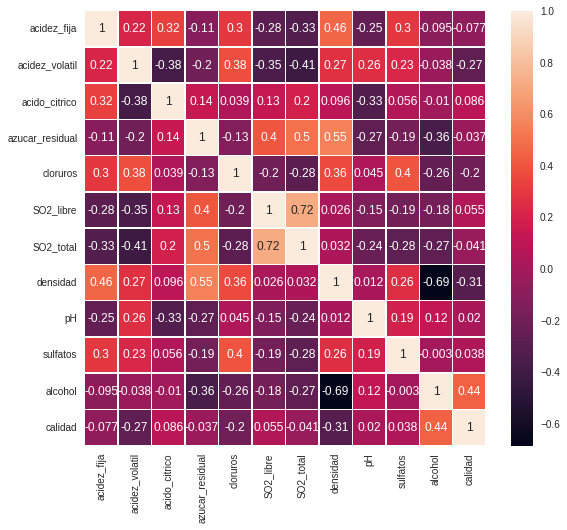

In [8]:
corr_matrix = vinos.corr(method='pearson')
plt.figure(figsize=(9,8))
sns.heatmap(corr_matrix, 
            annot=True,
            linewidths=.5)
plt.show()

Las correlaciones mayores encontradas son entre SO2 Total y SO2 libre y entre alcohol y densidad. A futuro, se puede considerar la eliminacion de las una caracteristica de cada par que presenta colinealidad.

###**Inicialización de PyCaret**
Se genera el entorno de PyCaret con el dataframe vinos.




In [9]:
vinos_setup = setup(vinos, session_id=2841)

,Description,Value
0,session_id,2841
1,Original Data,"(6497, 12)"
2,Missing Values,False
3,Numeric Features,11
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(6497, 18)"
9,CPU Jobs,-1


Como experimento base, no se realizó ninguna personalización de los parámetros de la función setup del modelo en PyCaret. Se procede con verificar los modelos disponibles en la librería.

In [12]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


###**Creación, asignación y visualización del modelo**
Se utilizará el algoritmo de K-Means como modelo inicial para clusters con un total de 4 clusters. Con este modelo asignado, se visualizará su desempeño.


In [14]:
vinos_Kmeans = create_model('kmeans', num_clusters=4)
print(vinos_Kmeans)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4503,14173.4986,0.7151,0,0,0


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=2841, tol=0.0001, verbose=0)


In [15]:
vinos_clusters = assign_model(vinos_Kmeans)
vinos_clusters.head()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,SO2_libre,SO2_total,densidad,pH,sulfatos,alcohol,calidad,Cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Cluster 2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Cluster 0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Cluster 2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Cluster 2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Cluster 2


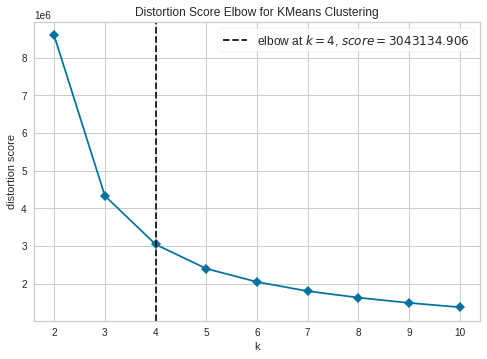

In [17]:
plot_model(vinos_Kmeans, plot = 'elbow')

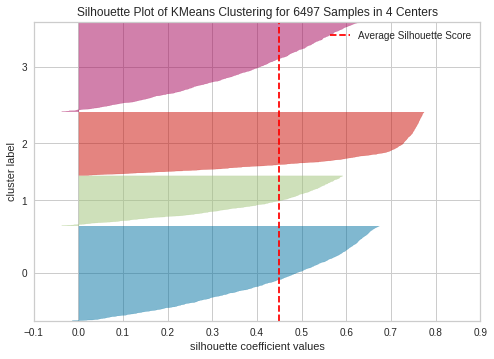

In [18]:
plot_model(vinos_Kmeans, plot = 'silhouette')

In [24]:
plot_model(vinos_Kmeans, plot = 'distribution')

##**Conclusiones**
1. 
2. 
3. 
4. 